<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Classification_Decision_Tree_and_Random_forest_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Using Decision Tree Classifier
-------------------------------------------------

**Dataset** - [Kaggle Kyphosis Dataset](https://www.kaggle.com/abbasit/kyphosis-dataset)


## 1. importing library

In [1]:
# Uploading the file
from google.colab import files
csv=files.upload()

Saving kyphosis.csv to kyphosis.csv


In [2]:
!ls

kyphosis.csv  sample_data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Analyzing data

In [4]:
data=pd.read_csv('kyphosis.csv')
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.info()   # one object type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
data.isna().sum()         # No Null

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [8]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

## 3. Visualizing the data

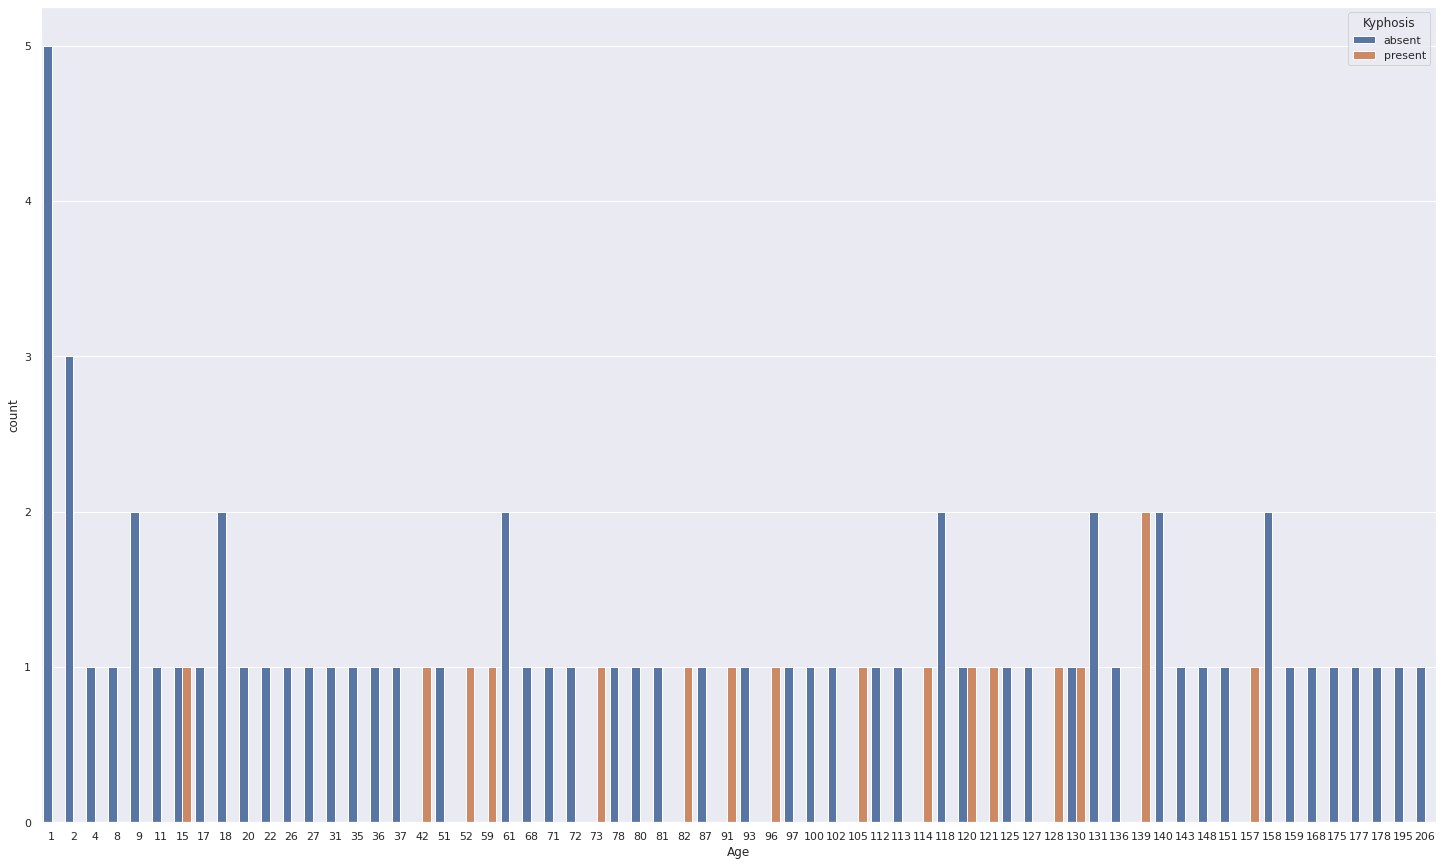

In [9]:
plt.figure(figsize=(25,15))
sns.countplot(x='Age',hue='Kyphosis',data=data)

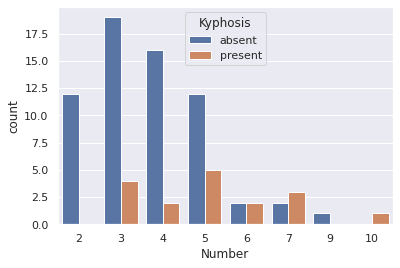

In [10]:
sns.countplot(x='Number',hue='Kyphosis',data=data)

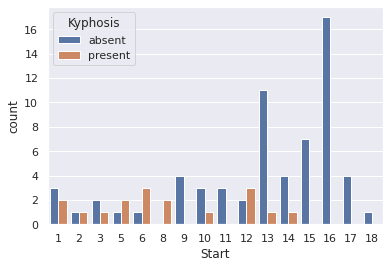

In [11]:
sns.countplot(x='Start',hue='Kyphosis',data=data)

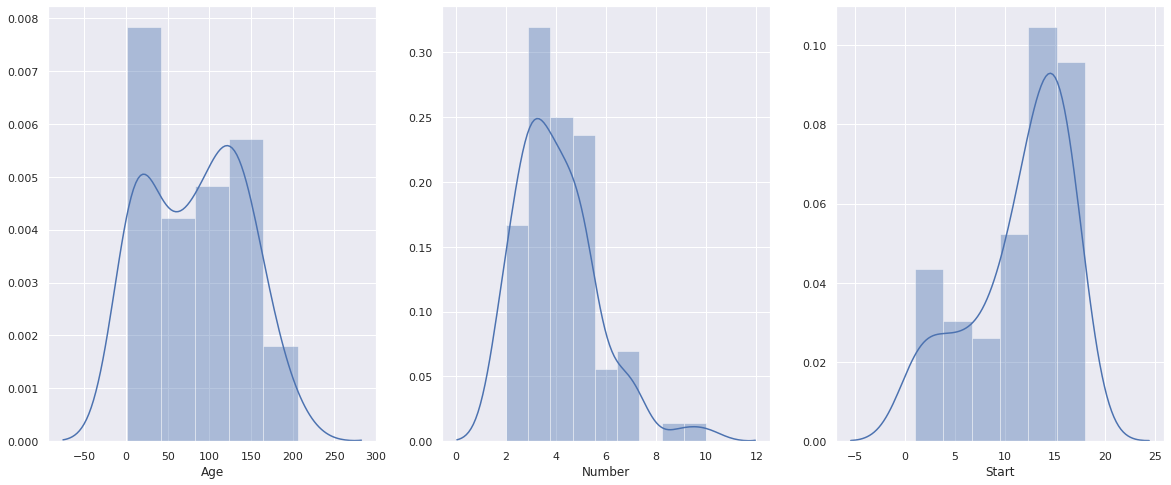

In [12]:
k=1
fig,arr=plt.subplots(1,3,figsize=(20,8))

for col in data.columns[1:] :
  plt.subplot(1,3,k)
  sns.distplot(data[col])
  k+=1

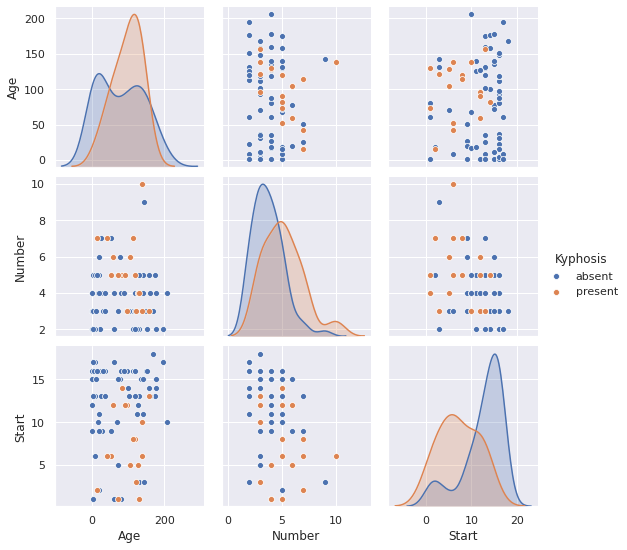

In [13]:
sns.pairplot(data, hue='Kyphosis')

## 4. Making the pipeline

In [0]:
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import LabelEncoder as le
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.compose import ColumnTransformer as ct

In [0]:
preprocessor=le()
model=dct(random_state=42)

## 4. Splitting the data for training and testing


In [0]:
from sklearn.model_selection import train_test_split as tts

In [17]:
preprocessor.fit_transform(data.iloc[:,0])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [18]:
data.iloc[:,0]=preprocessor.fit_transform(data.iloc[:,0])
x=data.iloc[:, 1:]
y=data.iloc[:,0]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: int64

In [0]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

## 6. Training 

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## 7. Predicting

In [0]:
pred=model.predict(x_test)

## 8. Accuracy Evaluation

In [0]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score

In [23]:
accuracy_score(y_test,pred)   # 72% Accuracy

0.72

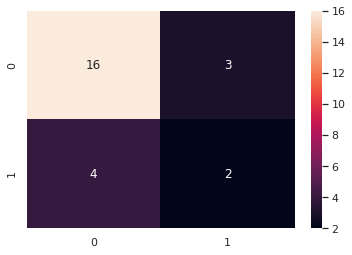

In [24]:
sns.heatmap(cm(y_test,pred),annot=True)

## Doing GridSearch

In [0]:
param_grid={'criterion': ['gini','entropy'],
            'max_depth': np.arange(2,15) ,
            'min_samples_split': np.arange(2,10),
            'max_leaf_nodes' : np.arange(2,10),
            'ccp_alpha': [0.1,0.001,0.01,0.2,0.02,0.05,0.5,0.8,1,2,3,4,5,6,3.5]
           }

In [0]:
from sklearn.model_selection import GridSearchCV as gsc 

In [0]:
model_dtc=dct(random_state=42)
model_gsc= gsc(model_dtc,cv=5,param_grid=param_grid,scoring='accuracy')

In [28]:
model_gsc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='depr..._jobs=None,
             param_grid={'ccp_alpha': [0.1, 0.001, 0.01, 0.2, 0.02, 0.05, 0.5,
        

In [29]:
model_gsc.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.1, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [30]:
model_gsc.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_split': 2}

In [31]:
pd.DataFrame({ 'Columns': x.columns, 'Importance_val' :model_gsc.best_estimator_.feature_importances_})  # getting importance of feature

,Columns,Importance_val
0,Age,0.0
1,Number,0.0
2,Start,1.0


In [0]:
pred=model_gsc.predict(x_test)

In [33]:
accuracy_score(y_test,pred)   # 76 % Accuracy

0.76

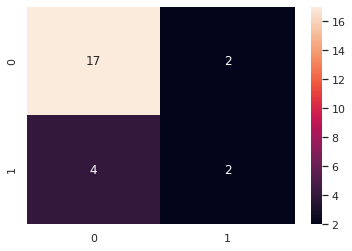

In [34]:
sns.heatmap(cm(y_test,pred),annot=True)

**Note**

Doing Gridsearch, we have improved the accuracy ***`from 72% to 76%`***

#  Using Randomforest
-----------------------------------

## 5. Making the classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [0]:
model=rfc(n_estimators=150,random_state=42)

## 6. Training 

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## 7. Predicting

In [0]:
pred=model.predict(x_test)

## 8. Accuracy Evaluation

In [39]:
accuracy_score(y_test,pred)   # 80% : Accuracy is improved..

0.8

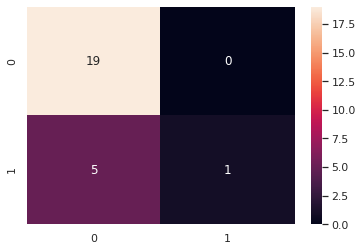

In [40]:
sns.heatmap(cm(y_test,pred),annot=True)

### Now doing GridSearch with RandomForest
---------------------------------

In [0]:
param_grid={'n_estimators': np.arange(100,500,20),
            'max_depth': np.arange(2,15) ,
            'min_samples_split': np.arange(2,15),
            'max_leaf_nodes' : np.arange(2,15),
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha': [0.1,0.001,0.01,0.2,0.02,0.05,0.5,0.8,1,2,3]
           }

In [0]:
from sklearn.model_selection import RandomizedSearchCV as rscv 

In [0]:
rf_model=rfc(random_state=42)
model_rsc= rscv(rf_model,param_distributions=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [72]:
model_rsc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
pred=model_rsc.predict(x_test)

In [74]:
model_rsc.best_params_

{'ccp_alpha': 0.01,
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 5,
 'min_samples_split': 3,
 'n_estimators': 320}

In [75]:
pd.DataFrame({ 'Columns': x.columns, 'Importance_val' :model_rsc.best_estimator_.feature_importances_})  # getting importance of feature

,Columns,Importance_val
0,Age,0.285032
1,Number,0.261903
2,Start,0.453065


In [76]:
accuracy_score(y_test,pred)   # 80% : Accuracy is improved..

0.8

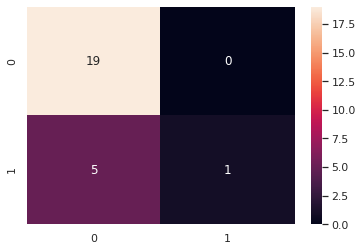

In [77]:
sns.heatmap(cm(y_test,pred),annot=True)